In [1]:
#required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def data_country_col(filename):
    '''
    load the dataframe and get the country and year features and return two datframes.
    '''
    data_y = pd.read_excel(filename,engine="openpyxl")
    data_t = pd.melt(data_y, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                    var_name='Year', value_name='Value')
    data_c = data_t.pivot_table(index=['Year', 'Country Code', 'Indicator Name', 'Indicator Code'], columns='Country Name', values='Value').reset_index()
    data_c = data_c.drop_duplicates().reset_index()
    return data_y,data_c



In [3]:
data_y,data_c = data_country_col('world_bank_climate.xlsx')

In [4]:
data_y.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776,50.761000,50.746000,50.730000,50.715000,50.700000,...,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000,43.866000,44.052000
1,Aruba,ABW,Urban population,SP.URB.TOTL,27728.000,28330.000000,28764.000000,29157.000000,29505.000000,29802.000000,...,44228.000000,44588.000000,44943.000000,45297.000000,45648.000000,45999.000000,46351.000000,46574.000000,46734.000000,46891.000000
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,NaN,2.147858,1.520329,1.357042,1.186472,1.001576,...,0.826413,0.810669,0.793026,0.784578,0.771899,0.765986,0.762321,0.479958,0.342951,0.335381
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.000,55811.000000,56682.000000,57475.000000,58178.000000,58782.000000,...,102880.000000,103594.000000,104257.000000,104874.000000,105439.000000,105962.000000,106442.000000,106585.000000,106537.000000,106445.000000
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.179059,1.548572,1.389337,1.215721,1.032841,...,0.749301,0.691615,0.637959,0.590062,0.537296,0.494795,0.451970,0.134255,-0.045045,-0.086392


In [5]:
data_c.head(5)

Country Name,index,Year,Country Code,Indicator Name,Indicator Code,Afghanistan,Africa Eastern and Southern,Africa Western and Central,Albania,Algeria,...,Uzbekistan,Vanuatu,"Venezuela, RB",Viet Nam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
0,0,1960,ABW,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1960,ABW,CO2 emissions from gaseous fuel consumption (kt),EN.ATM.CO2E.GF.KT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1960,ABW,CO2 emissions from liquid fuel consumption (% ...,EN.ATM.CO2E.LF.ZS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1960,ABW,CO2 emissions from liquid fuel consumption (kt),EN.ATM.CO2E.LF.KT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1960,ABW,CO2 emissions from solid fuel consumption (% o...,EN.ATM.CO2E.SF.ZS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:

def year_data(data,a,b,s):
    '''
    get year data feartures
    '''
    data_sample = data.copy()
    years_needed=[i for i in range(a,b,s)]
    col_need=['Country Name','Indicator Name']
    col_need.extend(years_needed)
    data_sample =  data_sample[col_need]
    data_sample = data_sample.dropna(axis=0, how="any") 
    return data_sample

In [9]:
data_year_filt = year_data(data_y,1990,2020,4)

In [10]:
data_year_filt.head()

,Country Name,Indicator Name,1990,1994,1998,2002,2006,2010,2014,2018
0,Aruba,Urban population (% of total population),50.319000,49.177000,47.536000,45.972000,44.511000,43.059000,43.041000,43.411000
1,Aruba,Urban population,33066.000000,36740.000000,40099.000000,42194.000000,42555.000000,43206.000000,44588.000000,45999.000000
2,Aruba,Urban population growth (annual %),1.683480,2.363030,2.145091,0.401335,0.367258,0.294374,0.810669,0.765986
3,Aruba,"Population, total",65712.000000,74710.000000,84355.000000,91781.000000,95606.000000,100341.000000,103594.000000,105962.000000
4,Aruba,Population growth (annual %),1.712907,3.196029,3.004805,1.194718,1.181566,1.131541,0.691615,0.494795


In [15]:
countries_filt = data_year_filt['Country Name'].value_counts().index.tolist()[20:30]

In [16]:
data_year_filt['Country Name'].value_counts()

Country Name
Denmark                      30
Finland                      30
Bulgaria                     30
Korea, Rep.                  30
France                       29
                             ..
Macao SAR, China              8
Curacao                       7
Sint Maarten (Dutch part)     7
Kosovo                        3
St. Martin (French part)      3
Name: count, Length: 265, dtype: int64

In [17]:
countries_filt

['Netherlands',
 'Chad',
 'Switzerland',
 'United States',
 'Jordan',
 'Nigeria',
 'Mauritius',
 'Brazil',
 'Mexico',
 'Africa Western and Central']

In [18]:
data_year_filt['Indicator Name'].unique()

array(['Urban population (% of total population)', 'Urban population',
       'Urban population growth (annual %)', 'Population, total',
       'Population growth (annual %)',
       'Renewable energy consumption (% of total final energy consumption)',
       'Access to electricity (% of population)',
       'Foreign direct investment, net inflows (% of GDP)',
       'Forest area (% of land area)', 'Forest area (sq. km)',
       'Arable land (% of land area)',
       'Agricultural land (% of land area)', 'Agricultural land (sq. km)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'Primary completion rate, total (% of relevant age group)',
       'School enrollment, primary and secondary (gross), gender parity index (GPI)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Annual freshwater withdrawals, total (billion cubic meters)',
       'Population in urban agglomerations of more than 1 million (% of total population)',
       'Nitrous ox

In [19]:
def colum_specific_value(data,column,values):
    data_t= data.copy()
    data_req = data_t[data_t[column].isin(values)].reset_index(drop=True)
    return data_req

In [21]:
data_year_sample_country  = colum_specific_value(data_year_filt,'Country Name',countries_filt)

In [22]:
data_year_sample_country

,Country Name,Indicator Name,1990,1994,1998,2002,2006,2010,2014,2018
0,Africa Western and Central,Urban population (% of total population),3.097054e+01,3.266627e+01,3.439329e+01,3.655488e+01,3.907930e+01,4.164716e+01,4.418018e+01,4.664943e+01
1,Africa Western and Central,Urban population,6.402820e+07,7.502651e+07,8.786899e+07,1.041640e+08,1.245072e+08,1.484045e+08,1.757733e+08,2.064922e+08
2,Africa Western and Central,Urban population growth (annual %),4.700508e+00,3.925912e+00,4.131279e+00,4.556128e+00,4.558018e+00,4.466047e+00,4.227751e+00,4.029439e+00
3,Africa Western and Central,"Population, total",2.067390e+08,2.296758e+08,2.554829e+08,2.849523e+08,3.186015e+08,3.563378e+08,3.978555e+08,4.426468e+08
4,Africa Western and Central,Population growth (annual %),2.654931e+00,2.630610e+00,2.721941e+00,2.811453e+00,2.832780e+00,2.846536e+00,2.750731e+00,2.669239e+00
...,...,...,...,...,...,...,...,...,...,...
275,United States,Forest area (% of land area),3.302231e+01,3.306974e+01,3.311717e+01,3.324334e+01,3.346967e+01,3.374941e+01,3.386966e+01,3.386693e+01
276,United States,Forest area (sq. km),3.024500e+06,3.028844e+06,3.033188e+06,3.045728e+06,3.066464e+06,3.087200e+06,3.098200e+06,3.097950e+06
277,United States,Arable land (% of land area),2.027261e+01,1.986459e+01,1.930154e+01,1.887999e+01,1.790294e+01,1.724164e+01,1.706484e+01,1.724386e+01
278,United States,Agricultural land (% of land area),4.661534e+01,4.598109e+01,4.526584e+01,4.508487e+01,4.506684e+01,4.449251e+01,4.418436e+01,4.436337e+01


In [23]:
country_dict = dict()
for i in range(data_year_sample_country.shape[0]):
    if data_year_sample_country['Country Name'][i] not in country_dict.keys():
        country_dict[data_year_sample_country['Country Name'][i]]=[data_year_sample_country['Indicator Name'][i]]
    else:
        country_dict[data_year_sample_country['Country Name'][i]].append(data_year_sample_country['Indicator Name'][i])
    
    

In [24]:
for k,v in country_dict.items():
    country_dict[k] = set(v)

In [25]:
country_dict

{'Africa Western and Central': {'Agricultural land (% of land area)',
  'Agricultural land (sq. km)',
  'Agriculture, forestry, and fishing, value added (% of GDP)',
  'Annual freshwater withdrawals, total (% of internal resources)',
  'Annual freshwater withdrawals, total (billion cubic meters)',
  'Arable land (% of land area)',
  'CO2 emissions (kg per 2015 US$ of GDP)',
  'CO2 emissions (kg per 2017 PPP $ of GDP)',
  'CO2 emissions (kg per PPP $ of GDP)',
  'CO2 emissions (kt)',
  'CO2 emissions (metric tons per capita)',
  'Cereal yield (kg per hectare)',
  'Foreign direct investment, net inflows (% of GDP)',
  'Forest area (% of land area)',
  'Forest area (sq. km)',
  'Methane emissions (kt of CO2 equivalent)',
  'Mortality rate, under-5 (per 1,000 live births)',
  'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
  'Population growth (annual %)',
  'Population in urban agglomerations of more than 1 million (% of total population)',
  'Population, total',
  'Pr

In [26]:
inter = country_dict['Brazil']
for v in country_dict.values():
    inter = inter.intersection(v)

In [27]:
country_dict.keys()

dict_keys(['Africa Western and Central', 'Brazil', 'Switzerland', 'Jordan', 'Mexico', 'Mauritius', 'Nigeria', 'Netherlands', 'Chad', 'United States'])

In [28]:
inter

{'Agricultural land (% of land area)',
 'Agricultural land (sq. km)',
 'Annual freshwater withdrawals, total (% of internal resources)',
 'Annual freshwater withdrawals, total (billion cubic meters)',
 'Arable land (% of land area)',
 'CO2 emissions (kg per 2015 US$ of GDP)',
 'CO2 emissions (kg per 2017 PPP $ of GDP)',
 'CO2 emissions (kg per PPP $ of GDP)',
 'CO2 emissions (kt)',
 'CO2 emissions (metric tons per capita)',
 'Cereal yield (kg per hectare)',
 'Foreign direct investment, net inflows (% of GDP)',
 'Forest area (% of land area)',
 'Forest area (sq. km)',
 'Methane emissions (kt of CO2 equivalent)',
 'Mortality rate, under-5 (per 1,000 live births)',
 'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
 'Population growth (annual %)',
 'Population, total',
 'Renewable energy consumption (% of total final energy consumption)',
 'Total greenhouse gas emissions (kt of CO2 equivalent)',
 'Urban population',
 'Urban population (% of total population)',
 'Urban po

In [29]:
data_year_sample_country.describe()

,1990,1994,1998,2002,2006,2010,2014,2018
count,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02
mean,4.732151e+06,5.152534e+06,5.590053e+06,6.043967e+06,6.527076e+06,7.044930e+06,7.600129e+06,8.174902e+06
std,2.636138e+07,2.853588e+07,3.080610e+07,3.316691e+07,3.565513e+07,3.839461e+07,4.133156e+07,4.448375e+07
min,6.497017e-02,4.577608e-02,6.153754e-02,5.861547e-02,-3.747815e+00,-2.886397e-02,-4.845830e+00,-3.614035e+01
25%,2.621267e+00,2.509100e+00,2.541568e+00,2.510465e+00,2.691355e+00,2.950580e+00,3.123582e+00,2.606316e+00
50%,3.733560e+01,3.735915e+01,3.814856e+01,3.860357e+01,3.911918e+01,3.925454e+01,3.951383e+01,3.998216e+01
75%,5.756920e+03,5.904737e+03,5.724204e+03,5.836324e+03,6.223850e+03,6.278750e+03,6.507923e+03,6.477033e+03
max,2.496230e+08,2.631260e+08,2.758540e+08,2.876252e+08,3.186015e+08,3.563378e+08,3.978555e+08,4.426468e+08


In [30]:
df_year_for= colum_specific_value(data_year_sample_country,'Indicator Name',['Forest area (% of land area)'])

In [31]:
df_year_for.head(5)

,Country Name,Indicator Name,1990,1994,1998,2002,2006,2010,2014,2018
0,Africa Western and Central,Forest area (% of land area),22.776908,22.304258,21.831608,21.411029,21.042520,20.674012,20.322187,19.986100
1,Brazil,Forest area (% of land area),70.458021,68.648556,66.839091,64.988983,63.098232,61.207482,60.470868,59.708428
2,Switzerland,Forest area (% of land area),29.180908,29.612551,30.047144,30.461875,30.855766,31.248272,31.598223,31.947401
3,Jordan,Forest area (% of land area),1.104941,1.104941,1.104941,1.104941,1.104941,1.098220,1.098220,1.098220
4,Mexico,Forest area (% of land area),36.313511,35.858705,35.403899,35.028546,34.732645,34.436745,34.184722,33.924540


In [32]:
df_year_for.describe()

,1990,1994,1998,2002,2006,2010,2014,2018
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,25.778666,25.502919,25.227466,24.916443,24.571894,24.232859,24.041870,23.853018
std,19.693163,19.213089,18.742848,18.300572,17.890269,17.498532,17.395882,17.266295
min,1.104941,1.104941,1.104941,1.104941,1.104941,1.098220,1.098220,1.098220
25%,12.729609,12.897891,13.066174,13.125238,13.075084,13.032309,12.957230,13.032482
50%,25.950907,25.355973,24.761040,24.192140,23.649275,23.106410,22.571887,22.045242
75%,32.061958,32.205441,32.349661,32.547972,32.816191,33.124123,33.301800,33.387045
max,70.458021,68.648556,66.839091,64.988983,63.098232,61.207482,60.470868,59.708428


In [35]:
def country_bar_plot(data,indicator_variable):
    sample_df = data.copy()
    sample_df.set_index('Country Name', inplace=True)
    numeric_columns = sample_df.columns[sample_df.dtypes == 'float64']
    sample_df = sample_df[numeric_columns]
    plt.figure(figsize=(50, 50))
    sample_df.plot(kind='bar')
    plt.title(indicator_variable)
    plt.xlabel('Country Name')    
    plt.legend(title='Year', bbox_to_anchor=(1.10, 1), loc='upper left')
    plt.show()

<Figure size 5000x5000 with 0 Axes>

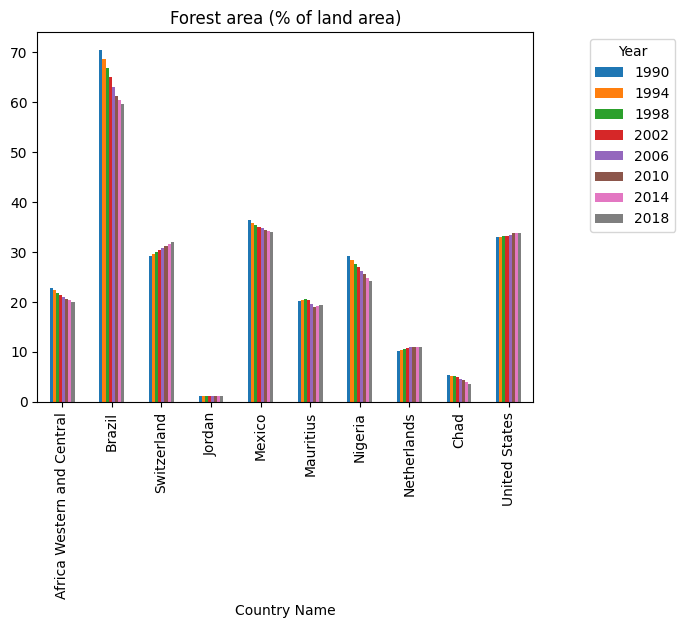

In [36]:
country_bar_plot(df_year_for,'Forest area (% of land area)')

In [38]:
df_year_met= colum_specific_value(data_year_sample_country,'Indicator Name',['Methane emissions (kt of CO2 equivalent)'])


In [39]:
df_year_met.describe()

,1990,1994,1998,2002,2006,2010,2014,2018
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,149667.731791,160424.287067,157763.404676,157653.150842,168727.977785,175513.911160,183870.206305,193943.269107
std,210917.046337,217060.633471,211755.880200,208277.624728,214879.045467,223927.173603,236668.624546,249485.616675
min,901.741405,936.857927,1225.540073,1464.262500,1592.170000,1702.580897,1826.533426,1927.561365
25%,8265.511411,11092.216260,8935.070278,9642.531584,8746.067011,8615.585779,8358.054965,8674.275993
50%,65092.929930,69237.169435,70378.996575,72629.827195,82017.883820,84525.784290,90045.663950,98032.156265
75%,218443.251921,254087.310467,252035.343547,241673.406682,275441.057964,284807.861701,299384.649766,325258.266254
max,672858.274800,683588.063600,658402.648400,629289.862600,629839.658100,652865.723500,699258.675500,743778.735400


<Figure size 5000x5000 with 0 Axes>

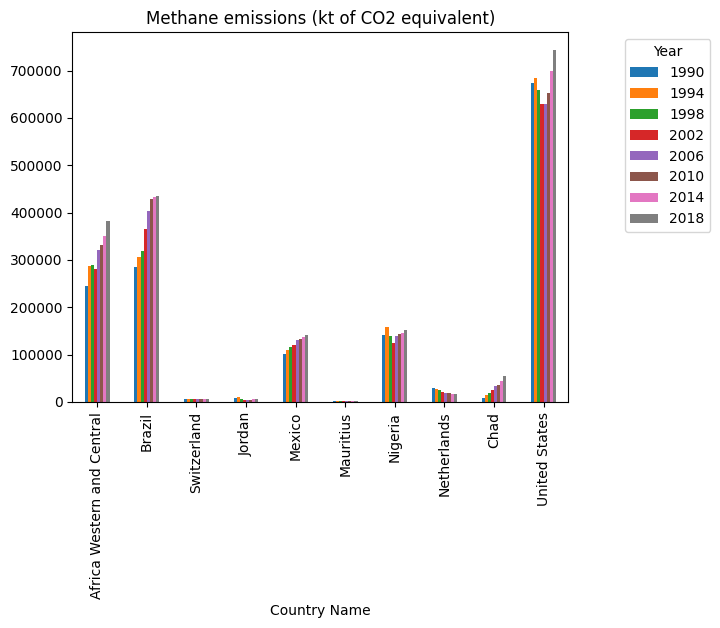

In [40]:
country_bar_plot(df_year_met,'Methane emissions (kt of CO2 equivalent)')

In [43]:
df_year_brazil= colum_specific_value(data_year_sample_country,'Country Name',['Brazil'])

In [44]:
def data_indicator(data):
    df_req=data.copy()
    # Melt the DataFrame
    df_req = df_req.melt(id_vars='Indicator Name', var_name='Year', value_name='Value')

    # Pivot the DataFrame
    df_req = df_req.pivot(index='Year', columns='Indicator Name', values='Value')

    # Reset index
    df_req.reset_index(inplace=True)
    df_req = df_req.apply(pd.to_numeric, errors='coerce')
    del df_req['Year']
    df_req = df_req.rename_axis(None, axis=1)
    return df_req

    
    

In [45]:
data_heat_map_brazil= data_indicator(df_year_brazil)

In [46]:
data_heat_map_brazil.head(5)

,Access to electricity (% of population),Agricultural land (% of land area),Agricultural land (sq. km),"Agriculture, forestry, and fishing, value added (% of GDP)","Annual freshwater withdrawals, total (% of internal resources)","Annual freshwater withdrawals, total (billion cubic meters)",Arable land (% of land area),Average precipitation in depth (mm per year),CO2 emissions (kg per 2015 US$ of GDP),CO2 emissions (kg per 2017 PPP $ of GDP),...,"Mortality rate, under-5 (per 1,000 live births)",Nitrous oxide emissions (thousand metric tons of CO2 equivalent),Population growth (annual %),Population in urban agglomerations of more than 1 million (% of total population),"Population, total",Renewable energy consumption (% of total final energy consumption),Total greenhouse gas emissions (kt of CO2 equivalent),Urban population,Urban population (% of total population),Urban population growth (annual %)
0,87.475116,28.104339,2349000.0,6.963441,0.735736,41.650000,5.663940,1782.0,0.215760,0.126240,...,63.2,106201.4520,1.809856,35.633609,150706446.0,49.82,592496.8304,111405219.0,73.922,2.874730
1,91.883728,27.424858,2292208.0,8.721989,0.891421,50.463333,5.131046,1782.0,0.217363,0.127178,...,51.1,118029.3664,1.590157,36.622299,160980472.0,48.30,651869.0688,123798812.0,76.903,2.533437
2,94.193812,27.292687,2281161.0,4.750045,0.979862,55.470000,5.299504,1782.0,0.256872,0.150295,...,39.5,123589.8200,1.468340,37.677365,171039804.0,43.79,735531.2444,136457266.0,79.781,2.391351
3,96.652996,27.342315,2285309.0,5.475275,1.002473,56.750000,5.575642,1761.0,0.256330,0.149978,...,30.4,140159.2720,1.262842,38.507966,180476685.0,42.85,826208.7209,147774310.0,81.880,1.663006
4,97.594314,27.392578,2289510.0,4.370044,1.025084,58.030000,5.852259,1782.0,0.235911,0.138030,...,23.2,152909.3342,1.077354,39.076667,188820682.0,46.67,897365.7002,156991180.0,83.143,1.449695


In [103]:
inter

{'Agricultural land (% of land area)',
 'Agricultural land (sq. km)',
 'Annual freshwater withdrawals, total (% of internal resources)',
 'Annual freshwater withdrawals, total (billion cubic meters)',
 'Arable land (% of land area)',
 'CO2 emissions (kg per 2015 US$ of GDP)',
 'CO2 emissions (kg per 2017 PPP $ of GDP)',
 'CO2 emissions (kg per PPP $ of GDP)',
 'CO2 emissions (kt)',
 'CO2 emissions (metric tons per capita)',
 'Cereal yield (kg per hectare)',
 'Foreign direct investment, net inflows (% of GDP)',
 'Forest area (% of land area)',
 'Forest area (sq. km)',
 'Methane emissions (kt of CO2 equivalent)',
 'Mortality rate, under-5 (per 1,000 live births)',
 'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
 'Population growth (annual %)',
 'Population, total',
 'Renewable energy consumption (% of total final energy consumption)',
 'Total greenhouse gas emissions (kt of CO2 equivalent)',
 'Urban population',
 'Urban population (% of total population)',
 'Urban po

In [48]:
features_need = ['Forest area (% of land area)',
 'Methane emissions (kt of CO2 equivalent)',
 'Mortality rate, under-5 (per 1,000 live births)',
 'CO2 emissions (metric tons per capita)',
 'Arable land (% of land area)',
 'Urban population growth (annual %)']

In [49]:
data_heat_map_brazil.columns

Index(['Access to electricity (% of population)',
       'Agricultural land (% of land area)', 'Agricultural land (sq. km)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Annual freshwater withdrawals, total (% of internal resources)',
       'Annual freshwater withdrawals, total (billion cubic meters)',
       'Arable land (% of land area)',
       'Average precipitation in depth (mm per year)',
       'CO2 emissions (kg per 2015 US$ of GDP)',
       'CO2 emissions (kg per 2017 PPP $ of GDP)',
       'CO2 emissions (kg per PPP $ of GDP)', 'CO2 emissions (kt)',
       'CO2 emissions (metric tons per capita)',
       'Cereal yield (kg per hectare)',
       'Foreign direct investment, net inflows (% of GDP)',
       'Forest area (% of land area)', 'Forest area (sq. km)',
       'Methane emissions (kt of CO2 equivalent)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
     

In [51]:
data_heat_map_brazil_map = data_heat_map_brazil[features_need]

In [52]:
data_heat_map_brazil_map.corr()

,Forest area (% of land area),Methane emissions (kt of CO2 equivalent),"Mortality rate, under-5 (per 1,000 live births)",CO2 emissions (metric tons per capita),Arable land (% of land area),Urban population growth (annual %)
Forest area (% of land area),1.000000,-0.989789,0.982472,-0.903287,-0.851159,0.981981
Methane emissions (kt of CO2 equivalent),-0.989789,1.000000,-0.970925,0.883618,0.851062,-0.988643
"Mortality rate, under-5 (per 1,000 live births)",0.982472,-0.970925,1.000000,-0.884072,-0.749898,0.982261
CO2 emissions (metric tons per capita),-0.903287,0.883618,-0.884072,1.000000,0.784278,-0.864827
Arable land (% of land area),-0.851159,0.851062,-0.749898,0.784278,1.000000,-0.806207
Urban population growth (annual %),0.981981,-0.988643,0.982261,-0.864827,-0.806207,1.000000


<Axes: >

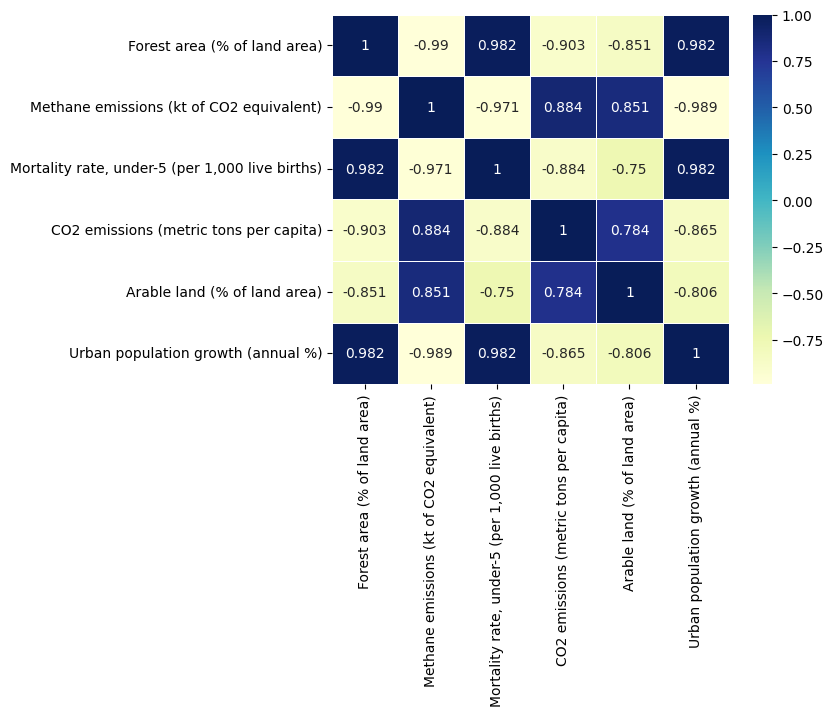

In [53]:
sns.heatmap(data_heat_map_brazil_map.corr(), annot=True, cmap='YlGnBu', linewidths=.5, fmt='.3g')

In [55]:
df_mort= colum_specific_value(data_year_sample_country,'Indicator Name',['Mortality rate, under-5 (per 1,000 live births)'])

In [57]:
df_mort.describe()

,1990,1994,1998,2002,2006,2010,2014,2018
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,81.456312,76.378160,70.382863,62.573569,55.341456,49.495457,45.393203,41.551414
std,87.999732,86.129659,81.580181,74.294019,66.445124,59.872035,54.912494,49.872276
min,8.200000,6.700000,5.800000,5.400000,4.900000,4.400000,4.100000,4.000000
25%,14.175000,12.750000,12.025000,10.300000,9.800000,9.125000,8.875000,8.550000
50%,40.700000,34.600000,29.700000,25.650000,22.350000,18.900000,16.550000,15.300000
75%,164.197338,156.311199,143.846470,126.726767,109.310919,96.565924,88.074020,80.510608
max,212.000000,205.700000,192.800000,177.700000,163.900000,148.400000,133.300000,119.600000


In [60]:
df_urban= colum_specific_value(data_year_sample_country,'Indicator Name',['Mortality rate, under-5 (per 1,000 live births)'])


In [61]:
df_urban

,Country Name,Indicator Name,1990,1994,1998,2002,2006,2010,2014,2018
0,Africa Western and Central,"Mortality rate, under-5 (per 1,000 live births)",197.863117,191.381599,178.628627,158.83569,138.014559,122.054565,111.432027,102.014144
1,Brazil,"Mortality rate, under-5 (per 1,000 live births)",63.200000,51.100000,39.500000,30.40000,23.200000,18.600000,16.300000,15.200000
2,Switzerland,"Mortality rate, under-5 (per 1,000 live births)",8.200000,6.700000,5.800000,5.40000,4.900000,4.600000,4.300000,4.100000
3,Jordan,"Mortality rate, under-5 (per 1,000 live births)",36.000000,31.700000,28.400000,25.40000,22.600000,20.100000,18.000000,16.000000
4,Mexico,"Mortality rate, under-5 (per 1,000 live births)",45.400000,37.500000,31.000000,25.90000,22.100000,19.200000,16.800000,14.700000
5,Mauritius,"Mortality rate, under-5 (per 1,000 live births)",23.100000,21.600000,21.700000,16.60000,15.500000,14.600000,14.800000,15.400000
6,Nigeria,"Mortality rate, under-5 (per 1,000 live births)",209.300000,205.700000,192.800000,171.40000,150.200000,135.700000,128.000000,119.600000
7,Netherlands,"Mortality rate, under-5 (per 1,000 live births)",8.300000,7.100000,6.400000,5.90000,5.100000,4.400000,4.100000,4.000000
8,Chad,"Mortality rate, under-5 (per 1,000 live births)",212.000000,201.200000,190.800000,177.70000,163.900000,148.400000,133.300000,118.000000
9,United States,"Mortality rate, under-5 (per 1,000 live births)",11.200000,9.800000,8.800000,8.20000,7.900000,7.300000,6.900000,6.500000


In [113]:
#df_urban.to_excel("ub5_assign.xlsx")

In [62]:
def time_plotting_feature(data,feature_label):
    data_verify = data.copy()
    data_verify.set_index('Country Name', inplace=True)
    num_col = data_verify.columns[data_verify.dtypes == 'float64']
    data_verify = data_verify[num_col]

    plt.figure(figsize=(12, 6))
    for count in data_verify.index:
        plt.plot(data_verify.columns, data_verify.loc[count], label=count, linestyle='dashed', marker='o')

    plt.title(feature_label)
    plt.xlabel('Year')
    plt.legend(title='Country', bbox_to_anchor=(1.15, 1), loc='upper left')

    plt.show()

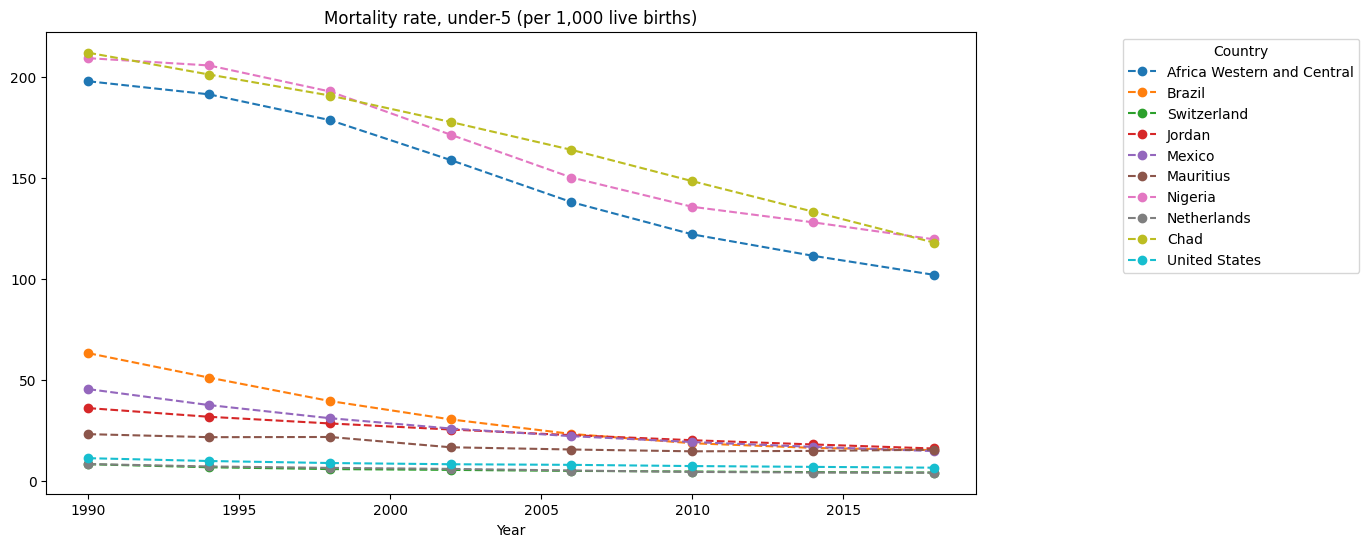

In [63]:
time_plotting_feature(df_mort,'Mortality rate, under-5 (per 1,000 live births)')

In [65]:
df_arb= colum_specific_value(data_year_sample_country,'Indicator Name',['Arable land (% of land area)'])


In [66]:
df_arb.describe()

,1990,1994,1998,2002,2006,2010,2014,2018
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,16.648670,16.772322,17.111708,17.498430,17.352037,17.069655,17.132669,17.031945
std,14.931283,14.602426,14.856943,15.093827,14.669731,14.241423,13.835788,13.890521
min,2.030825,2.391206,2.153218,2.209882,2.153218,2.000451,2.675152,2.264023
25%,6.266327,6.056690,6.378049,6.692471,6.958763,7.167240,7.363573,7.578841
50%,10.682361,11.102056,11.093555,11.119786,11.169308,11.281714,11.362653,10.955608
75%,25.604289,25.033535,25.483708,27.273316,28.242026,27.048328,27.529791,27.053762
max,48.275862,45.812808,44.827586,43.842365,40.886700,39.461115,39.599460,39.988142


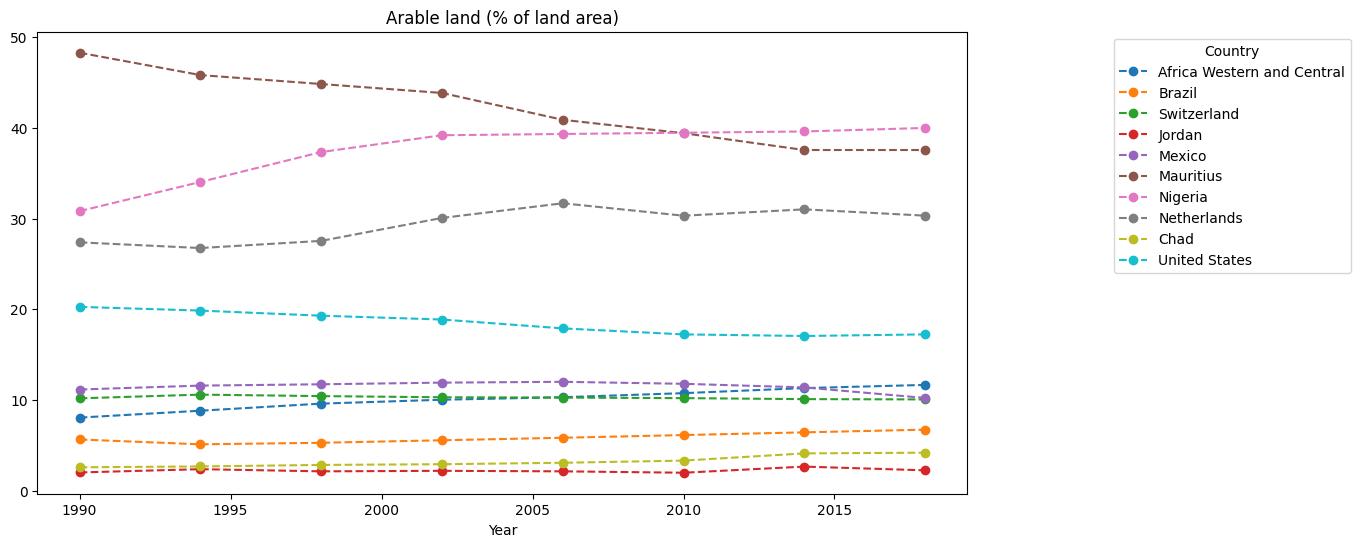

In [67]:
time_plotting_feature(df_arb,'Arable land (% of land area)')

<Axes: >

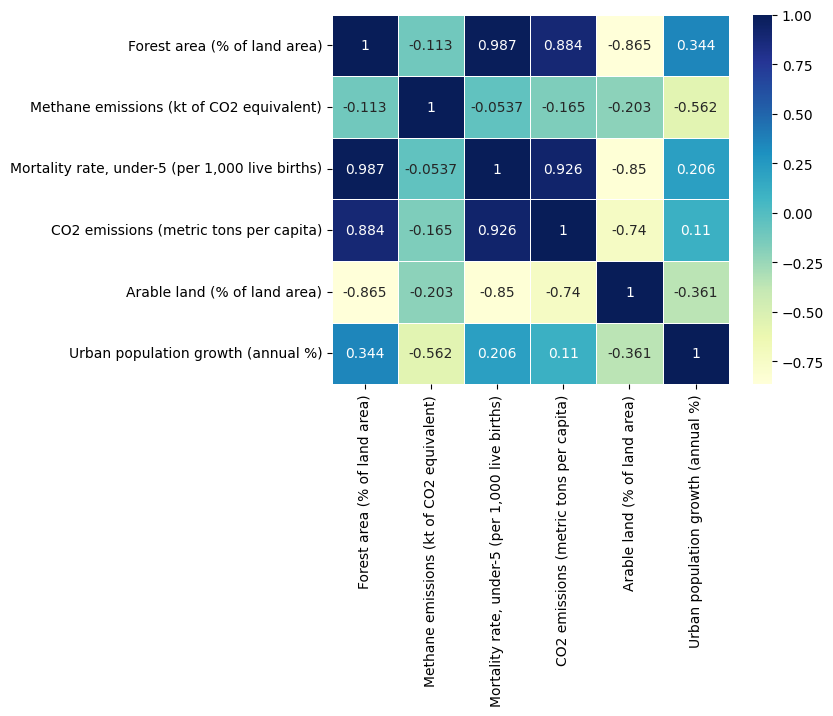

In [68]:
df_year_col_nig = colum_specific_value(data_year_sample_country,'Country Name',['Nigeria'])
df_year_col_nig = data_indicator(df_year_col_nig)
df_year_col_nig = df_year_col_nig[features_need]
sns.heatmap(df_year_col_nig.corr(), annot=True, cmap='YlGnBu', linewidths=.5, fmt='.3g')

<Axes: >

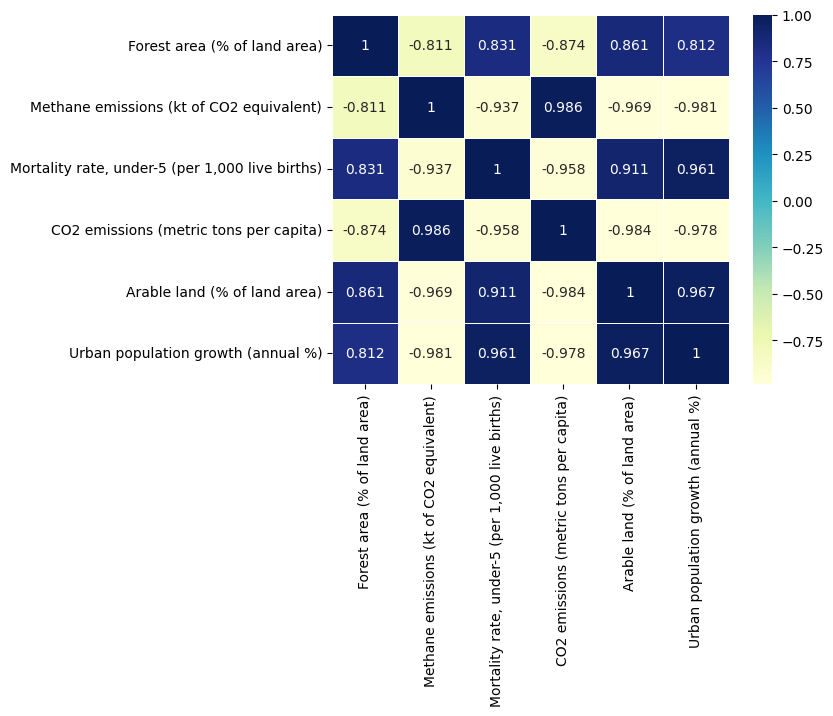

In [70]:
df_year_col_maur= colum_specific_value(data_year_sample_country,'Country Name',['Mauritius'])
df_year_col_maur = data_indicator(df_year_col_maur)
df_year_col_maur = df_year_col_maur[features_need]
sns.heatmap(df_year_col_maur.corr(), annot=True, cmap='YlGnBu', linewidths=.5, fmt='.3g')